# Industrial Safety Gear Detection using YOLOv8 on a Custom Dataset

In [ ]:
!pip install ultralytics -q

In [ ]:
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.86 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.9/78.2 GB disk)


## Getting Custom Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/computer vision

/content/drive/MyDrive/computer vision


In [ ]:
!ls

data  data.yaml  YoLov8.ipynb


In [ ]:
!yolo task=detect mode=train model=yolov8s.pt data= data.yaml epochs=25 imgsz=224 plots=True

100% 21.5M/21.5M [00:00<00:00, 80.8MB/s]
New https://pypi.org/project/ultralytics/8.2.87 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.86 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=data.yaml, epochs=25, time=None, patience=100, batch=16, imgsz=224, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=N

In [ ]:
!ls runs/detect/train

args.yaml					     P_curve.png	 train_batch121.jpg
confusion_matrix_normalized.png			     PR_curve.png	 train_batch122.jpg
confusion_matrix.png				     R_curve.png	 train_batch1.jpg
events.out.tfevents.1725362027.2eee7a465e2a.11713.0  results.csv	 train_batch2.jpg
F1_curve.png					     results.png	 val_batch0_labels.jpg
labels_correlogram.jpg				     train_batch0.jpg	 val_batch0_pred.jpg
labels.jpg					     train_batch120.jpg  weights


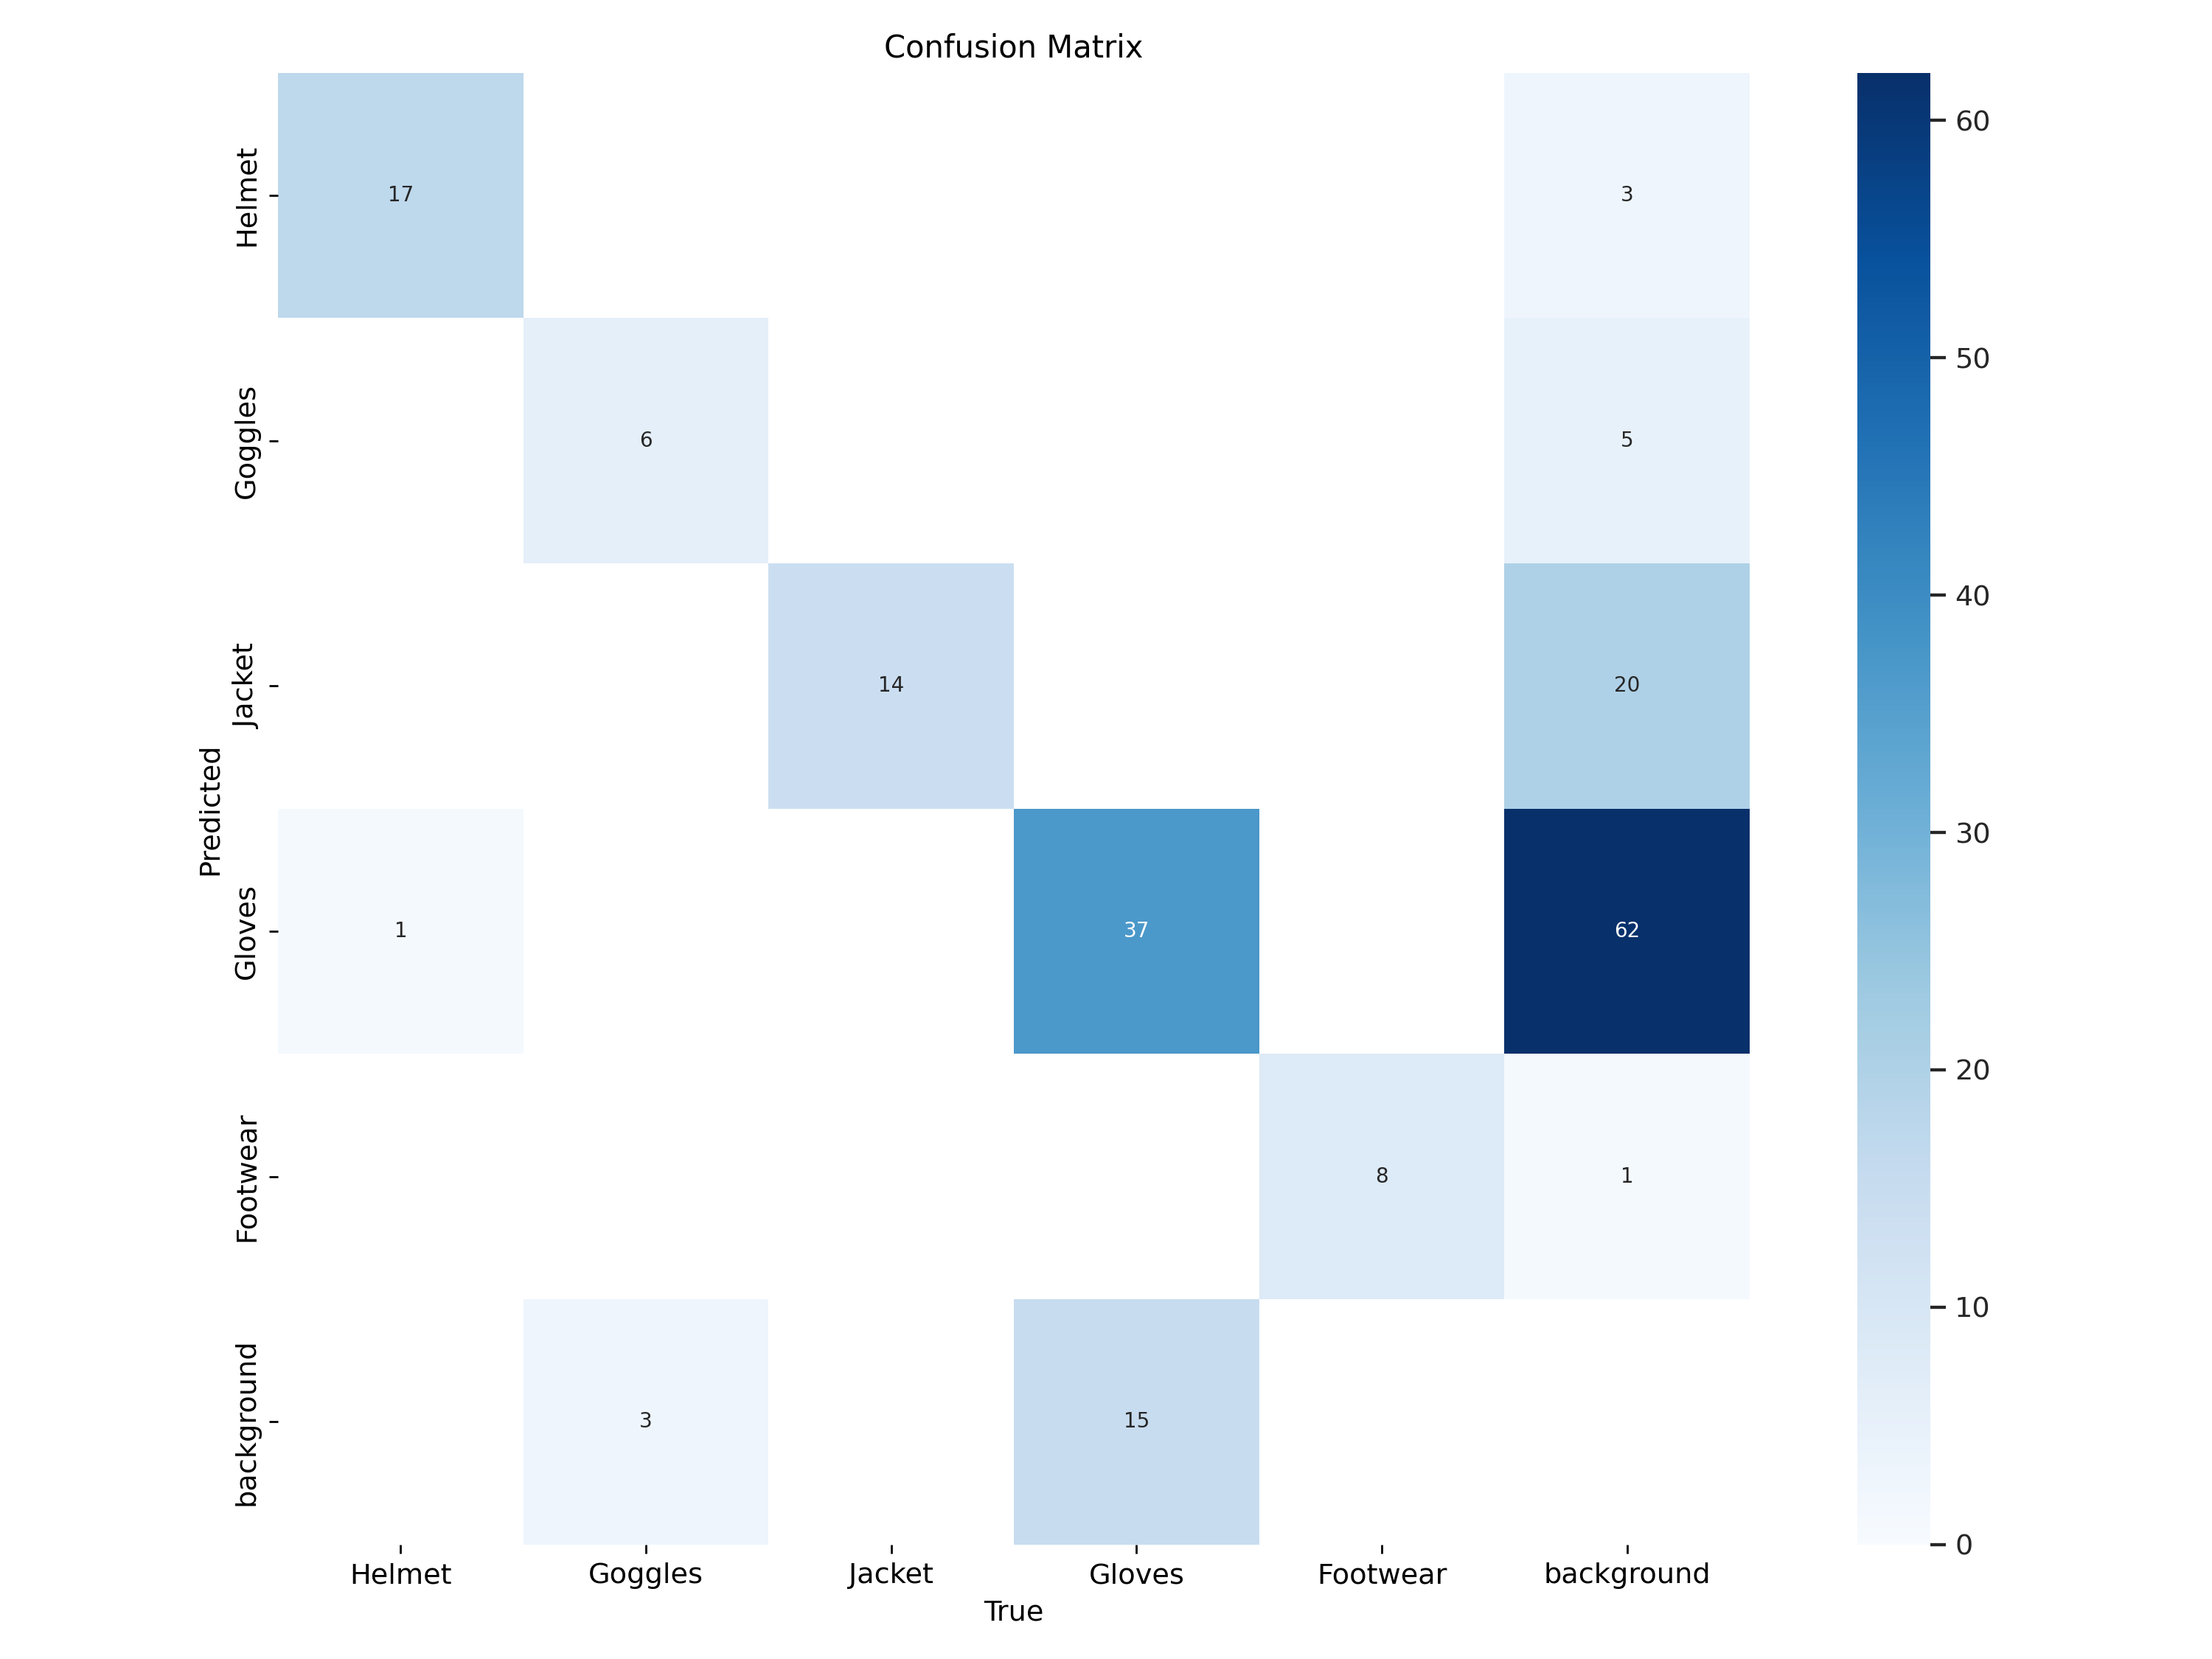

In [ ]:
from IPython.display import display, Image
Image(filename='runs/detect/train/confusion_matrix.png', width=600)

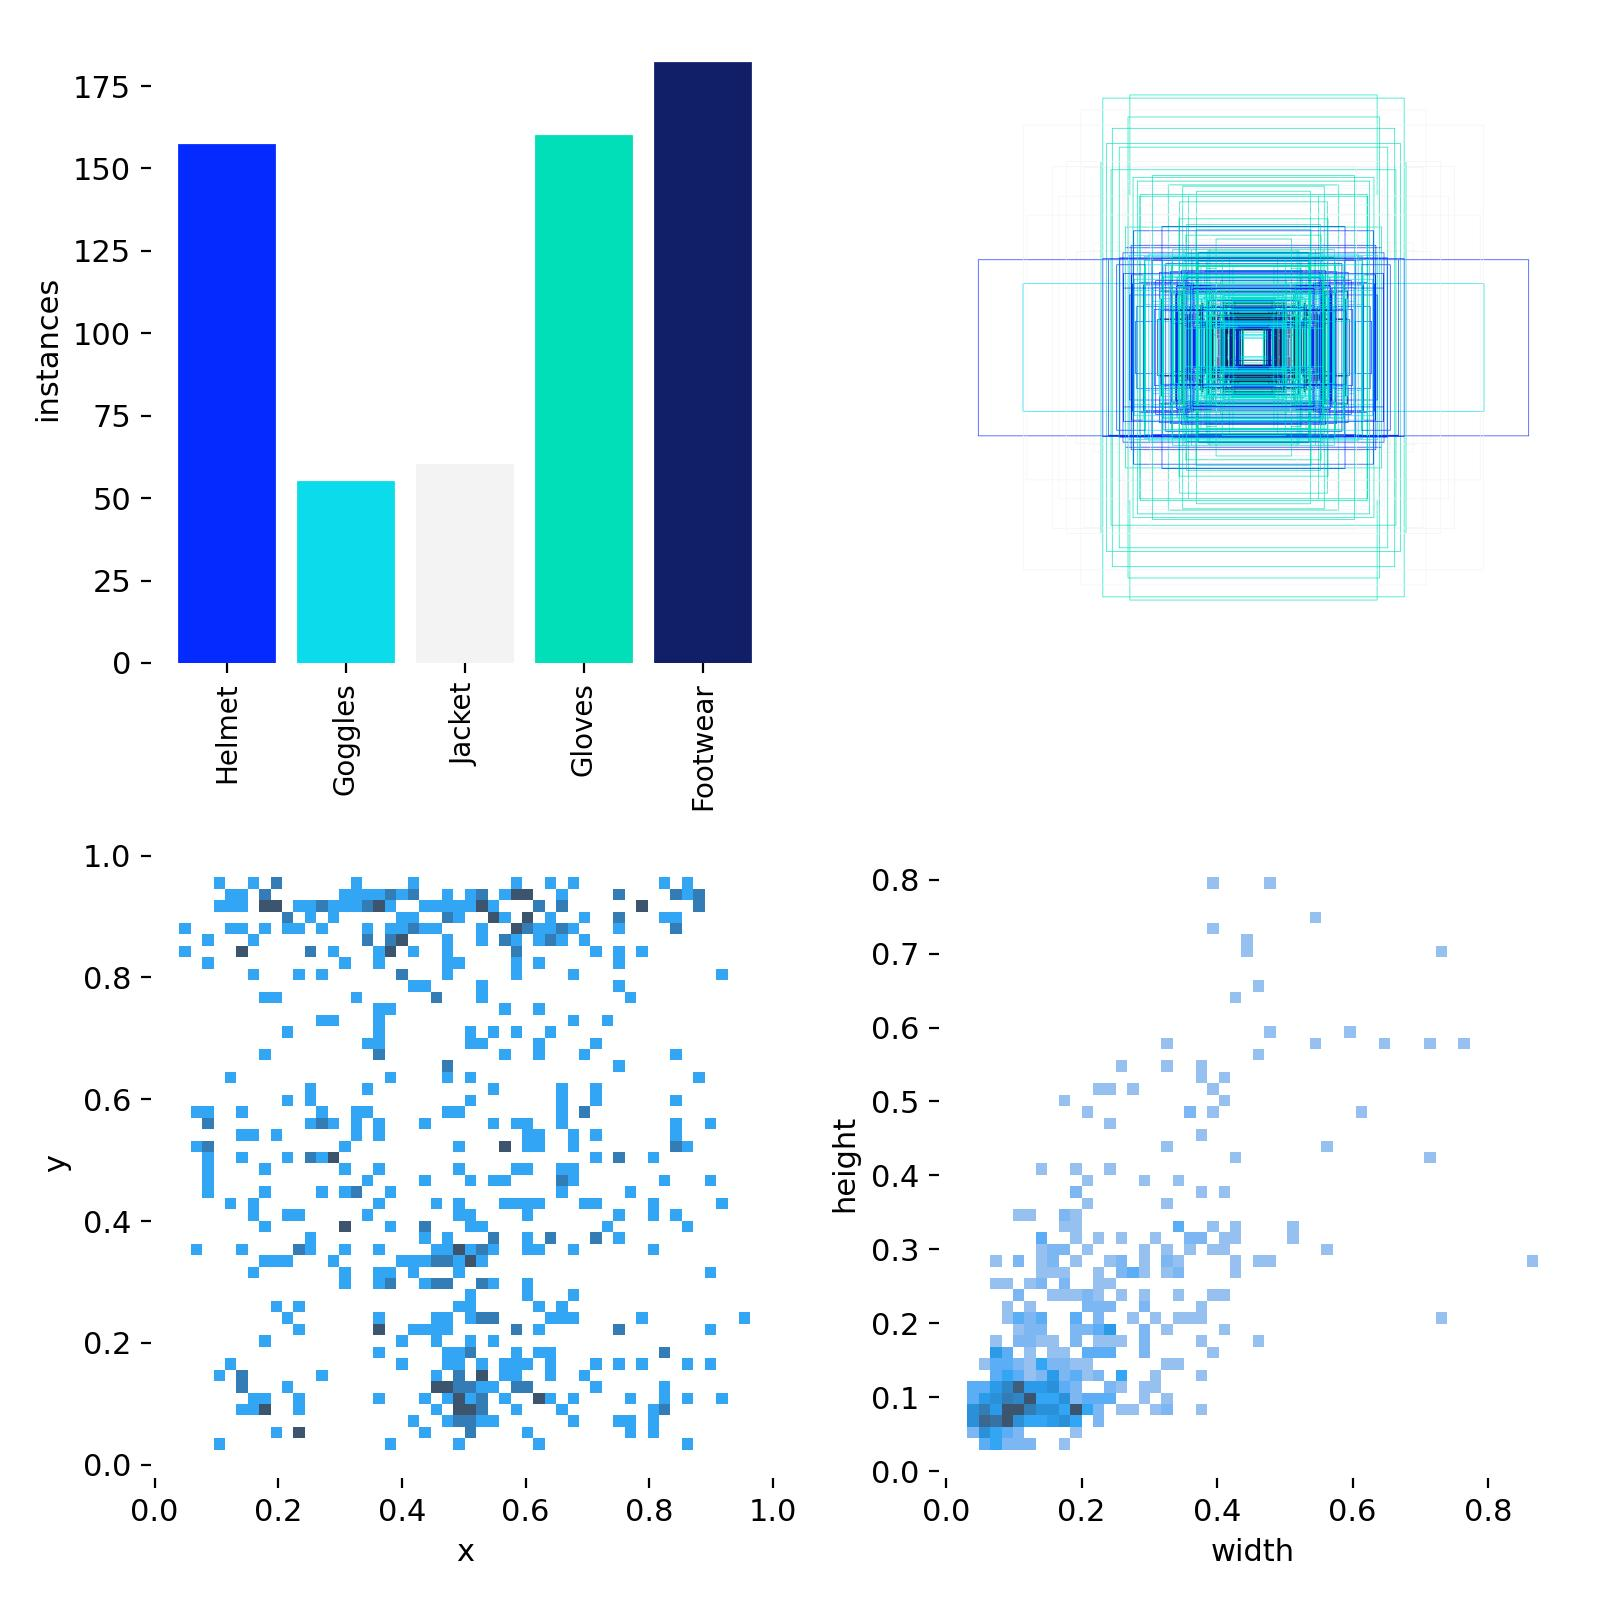

In [ ]:
Image(filename='runs/detect/train/labels.jpg', width=600)

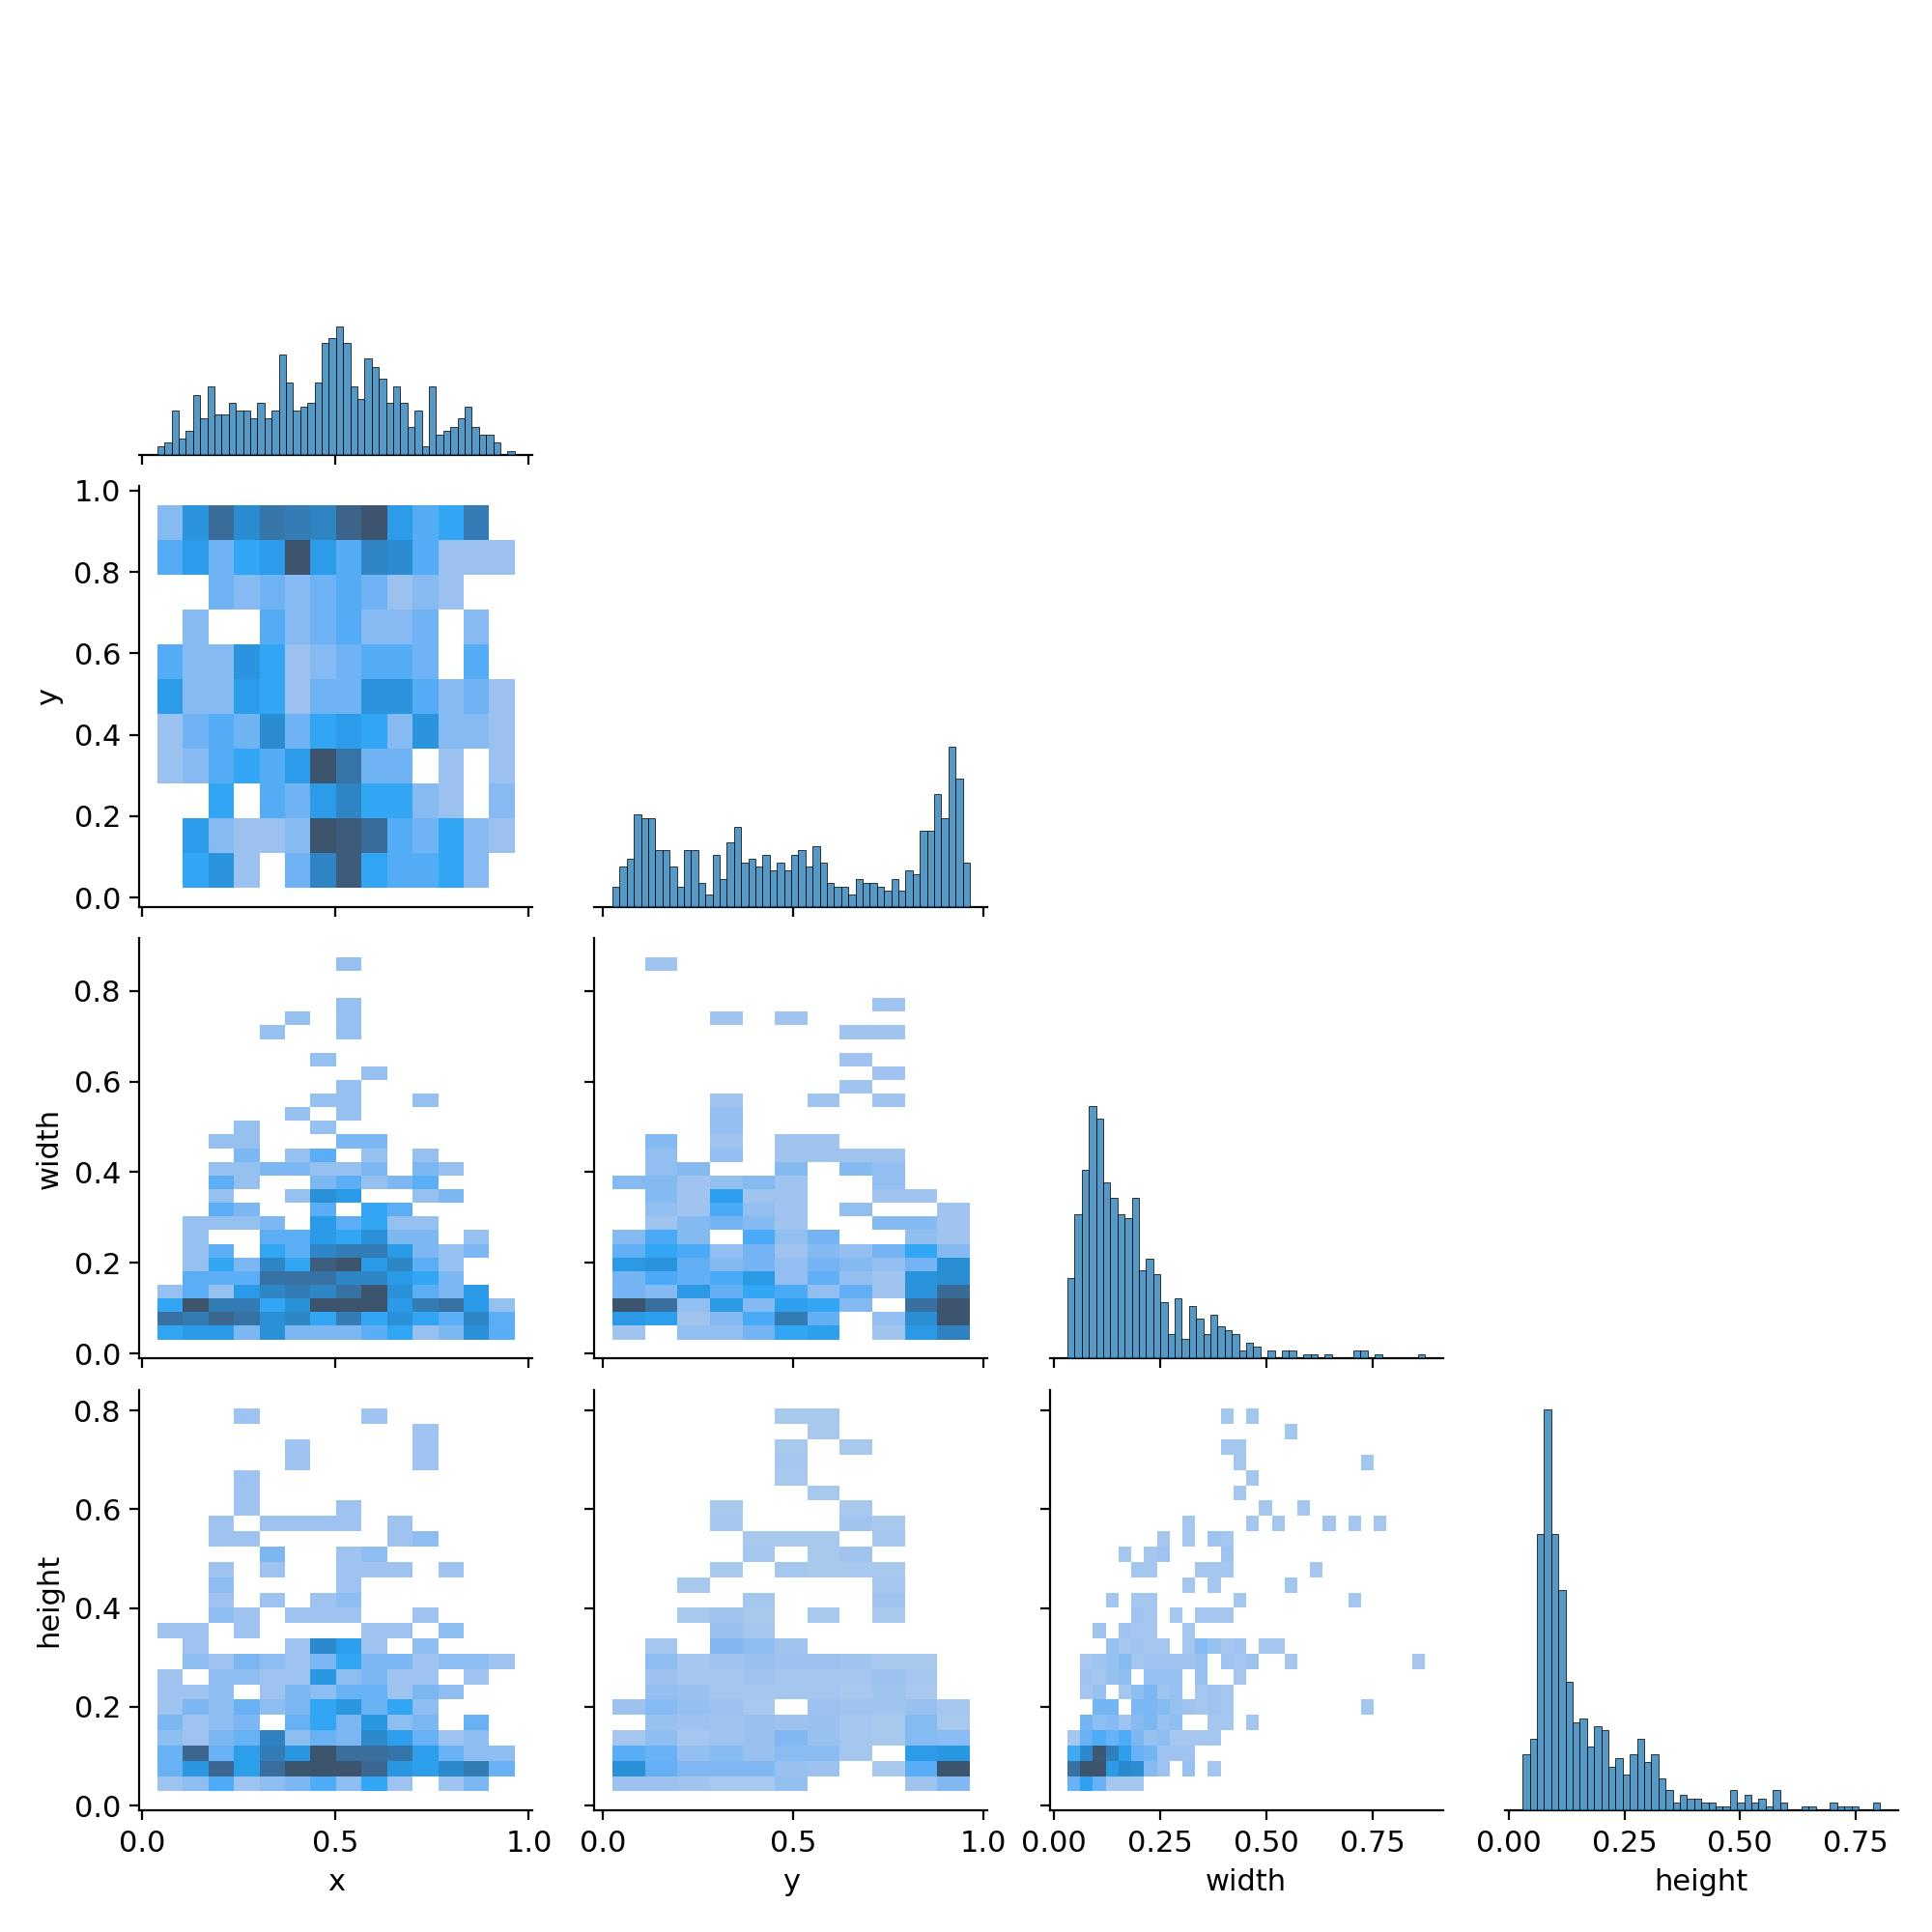

In [ ]:
Image(filename='runs/detect/train/labels_correlogram.jpg', width=600)

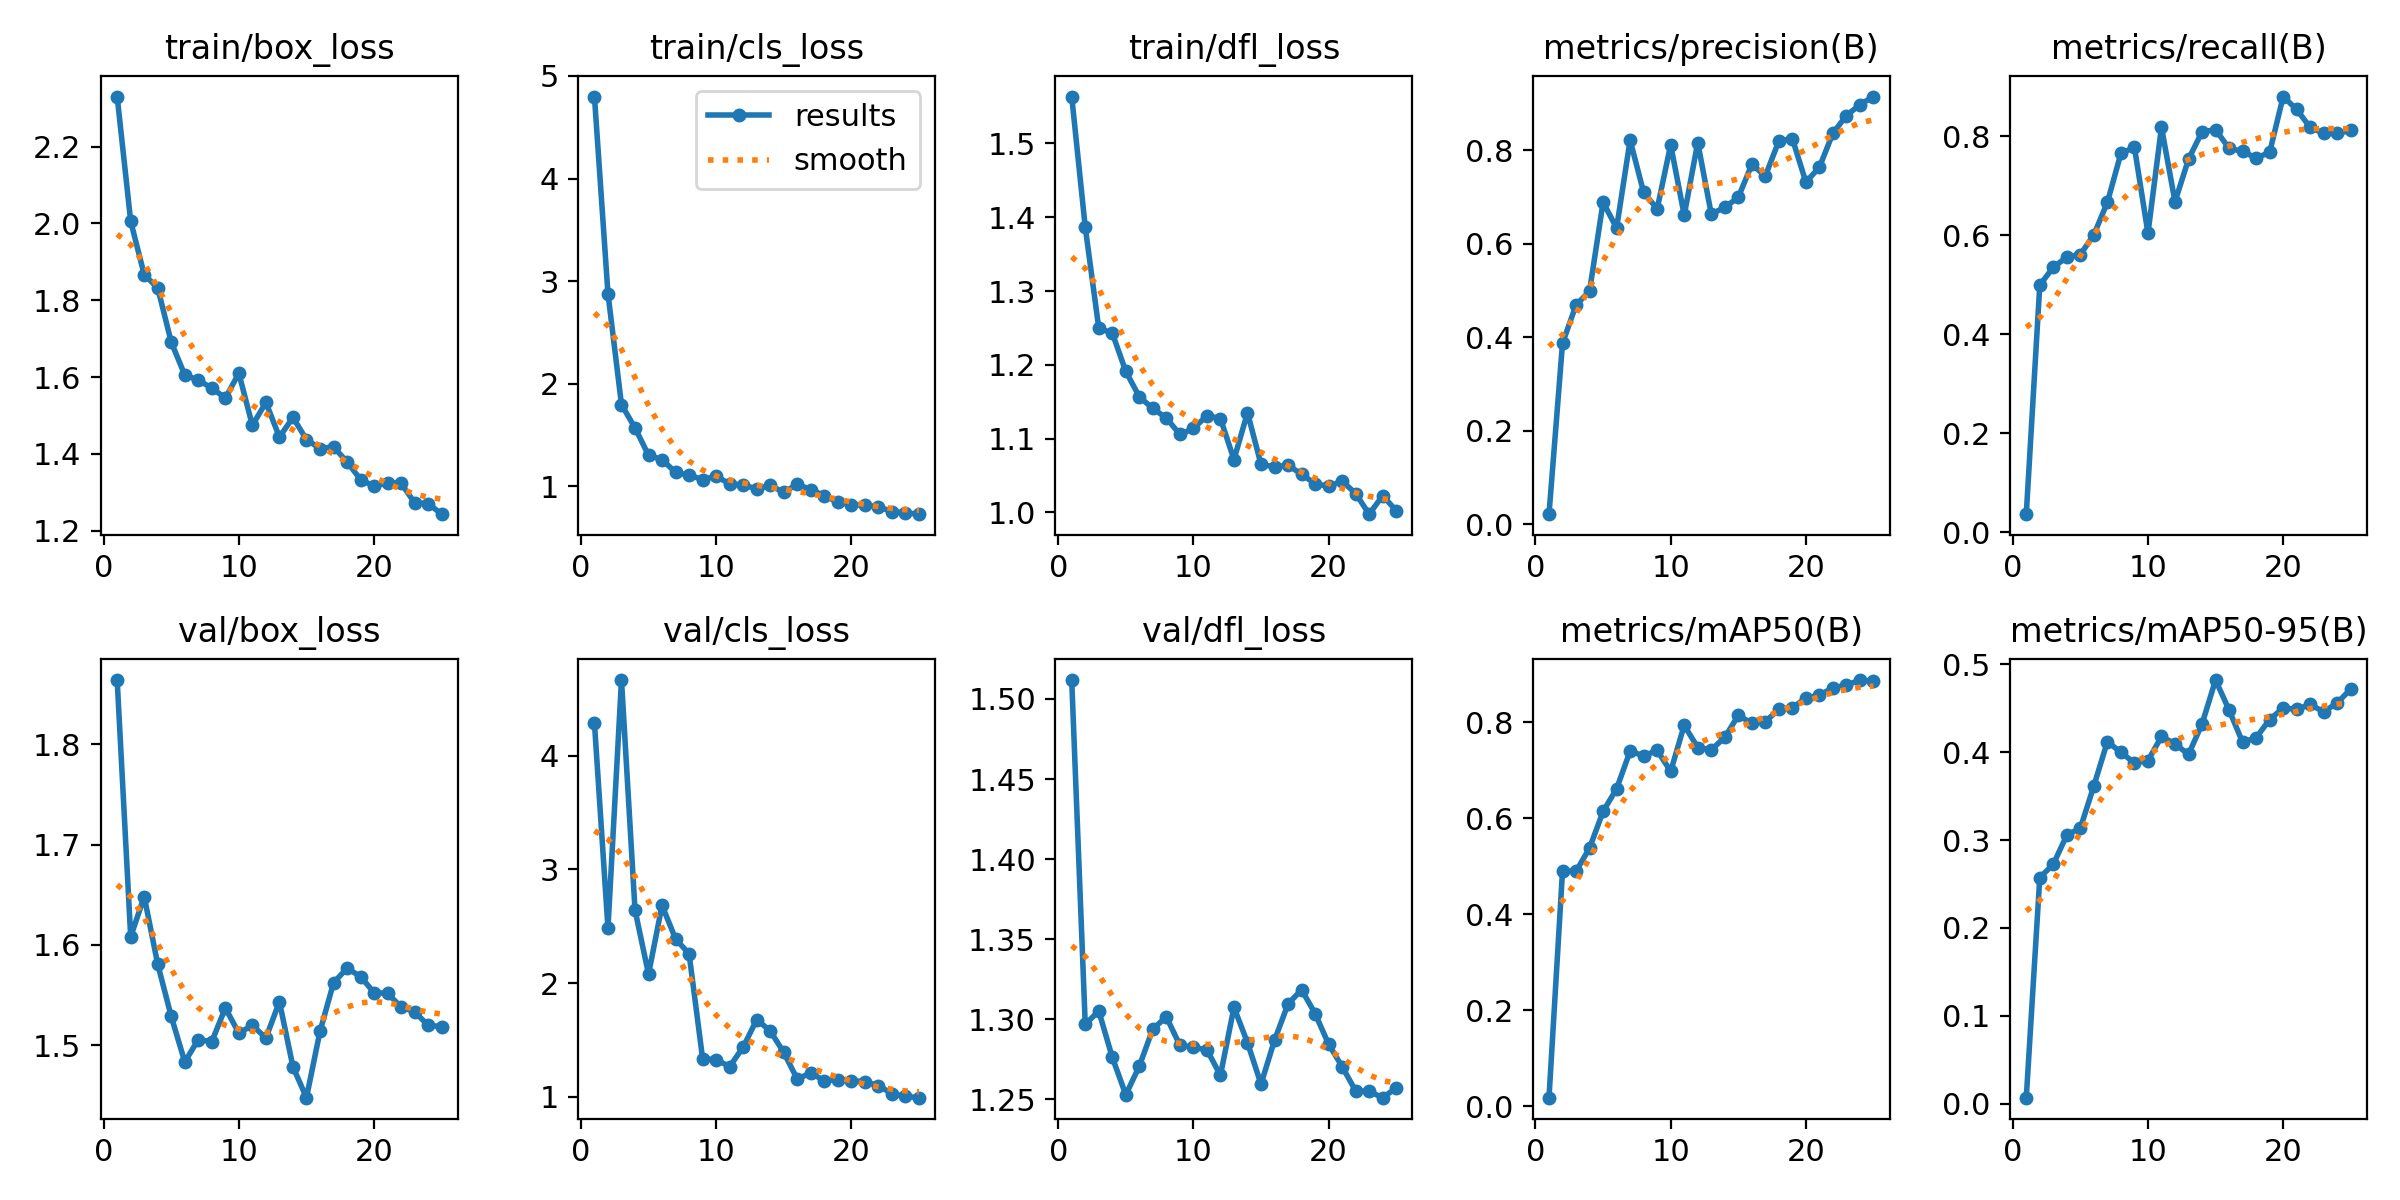

In [ ]:
Image(filename='runs/detect/train/results.png', width=600)

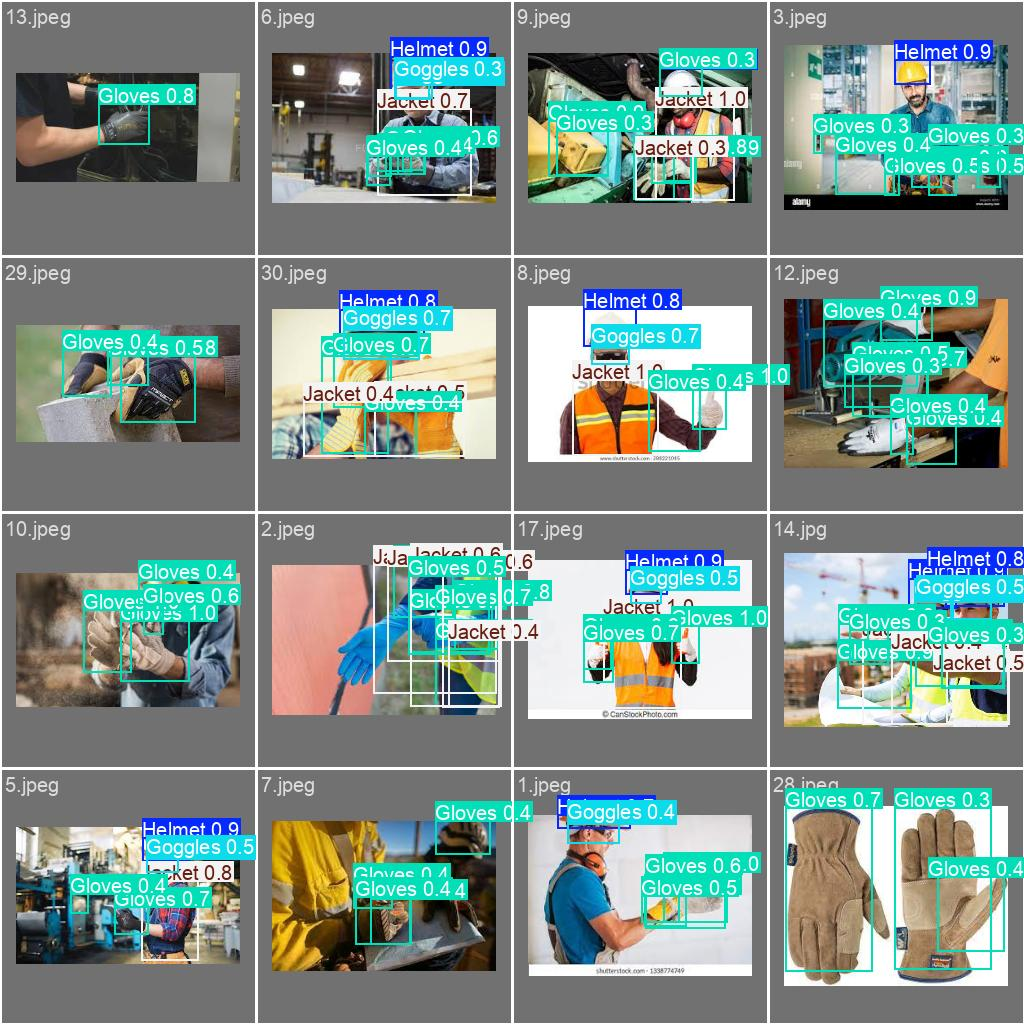

In [ ]:
Image(filename='runs/detect/train/val_batch0_pred.jpg', width=600)

## Validating Custom Model

In [ ]:
!yolo task=detect mode=val model=runs/detect/train/weights/best.pt data=data.yaml

Ultralytics YOLOv8.2.86 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,127,519 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/drive/MyDrive/computer vision/data/valid/labels.cache... 31 images, 0 backgrounds, 0 corrupt: 100% 31/31 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 2/2 [00:02<00:00,  1.16s/it]
                   all         31        101       0.69      0.782      0.797      0.467
                Helmet         17         18      0.893          1      0.968      0.652
               Goggles          9          9       0.56      0.444      0.549      0.211
                Jacket         13         14      0.509      0.929      0.932      0.668
                Gloves         30         52      0.493      0.538       0.54      0.287
              Footwear          4          8      0.997          1      0.995      0.515
Speed: 0.1ms preprocess, 30

## Inferencing with Custom Model

In [ ]:
!yolo task=detect mode=predict model=runs/detect/train/weights/best.pt conf=0.25 source=data/test/images

Ultralytics YOLOv8.2.86 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,127,519 parameters, 0 gradients, 28.4 GFLOPs

image 1/31 /content/drive/MyDrive/computer vision/data/test/images/1.jpeg: 192x224 4 Helmets, 2 Goggless, 4 Glovess, 47.7ms
image 2/31 /content/drive/MyDrive/computer vision/data/test/images/10.jpeg: 160x224 3 Glovess, 1 Footwear, 50.6ms
image 3/31 /content/drive/MyDrive/computer vision/data/test/images/11.jpeg: 224x224 1 Gloves, 9.4ms
image 4/31 /content/drive/MyDrive/computer vision/data/test/images/12.jpeg: 192x224 1 Jacket, 11 Glovess, 8.7ms
image 5/31 /content/drive/MyDrive/computer vision/data/test/images/13.jpeg: 128x224 1 Gloves, 45.9ms
image 6/31 /content/drive/MyDrive/computer vision/data/test/images/14(1).jpeg: 224x224 (no detections), 9.2ms
image 7/31 /content/drive/MyDrive/computer vision/data/test/images/14.jpg: 192x224 2 Helmets, 2 Goggless, 2 Jackets, 5 Glovess, 12.1ms
image 8/31 /content/drive/MyDrive

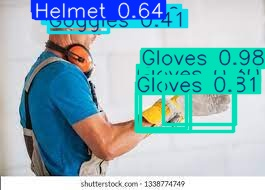

In [ ]:
import glob

image_paths = glob.glob('runs/detect/predict/*.jpeg')[:1]

for image_path in image_paths:
      display(Image(filename=image_path, height = 300, width=300))
      print("\n")